In [1]:
# Works best with jupyter-notebook

In [2]:
%matplotlib notebook 
#%matplotlib widget 
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import math

from spatialmath import *
from spatialmath.base import *

from collections import namedtuple

from roboticstoolbox import *
import roboticstoolbox.tools.trajectory as tr

import matplotlib.pyplot as plt

np.set_printoptions(linewidth=100, formatter={'float': lambda x: f"{x:8.4g}" if abs(x) > 1e-10 else f"{0:8.4g}"})

# Lecture 4.4

We will first learn to plot a multidimensional smooth trajectories with initial and final points. 

In [3]:
#Set a first point of (10, 20) and a last point of (30, 10):
first = np.array([10,20])
last  = np.array([30,10])

print(first, last)

[10 20] [30 10]


Compute a trajectory using the toolbox function jtraj(), 
accepting arguments of the first point, the last point and the number of timesteps:

tg = jtraj(q0, qf, M): is a joint space trajectory where the joint
coordinates vary from ``q0`` (N) to ``qf`` (N).  

A quintic (5th order) polynomial is used with default zero boundary conditions for velocity and acceleration.

In [4]:
timesteps = 50
out = tr.jtraj(first, last, timesteps)

In [6]:
t   = out.t   # time coordinate
print(out.t.shape) # pos, vel, acc
# print(t[1::5,1])

x   = out.q   # trajectory
print(x.shape)
print(x[1,:])
print(x[25,:])
print(x[-1,:])

xd  = out.qd  # velocity
xdd = out.qdd # acceleration

(50, 6)
(50, 2)
[      10       20]
[   20.38    14.81]
[      30       10]


Let us plot the trajectory below:

<IPython.core.display.Javascript object>


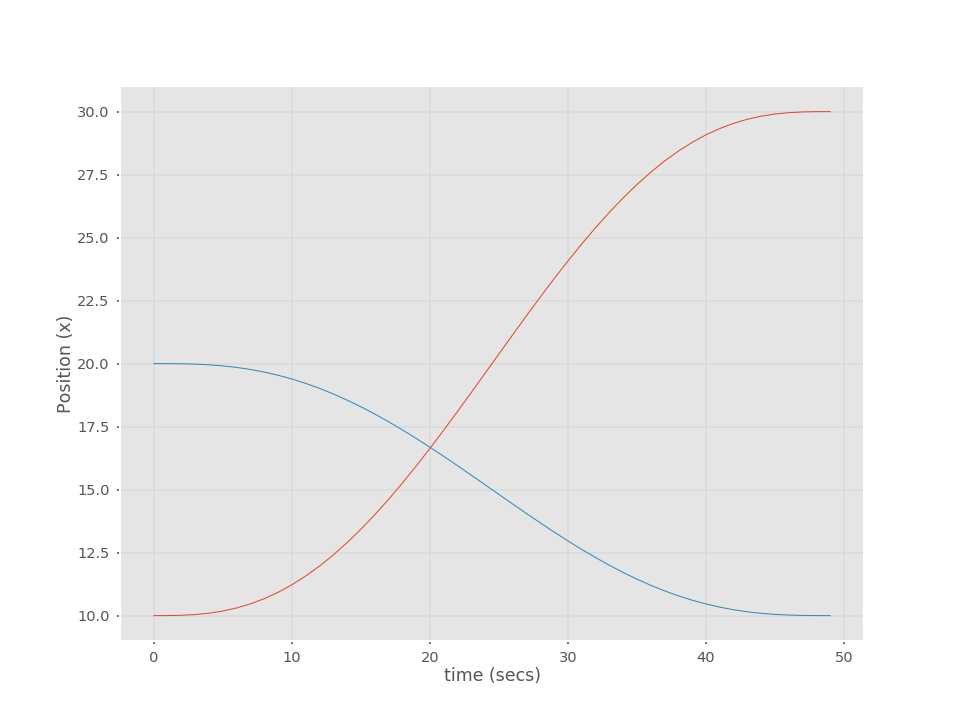

In [7]:
fig1 = plt.figure(1);

plt.xlabel('Time (secs)');
plt.ylabel('Position (x)');
plt.plot(x);

Plot the velocity graph for the two joints over time

<IPython.core.display.Javascript object>


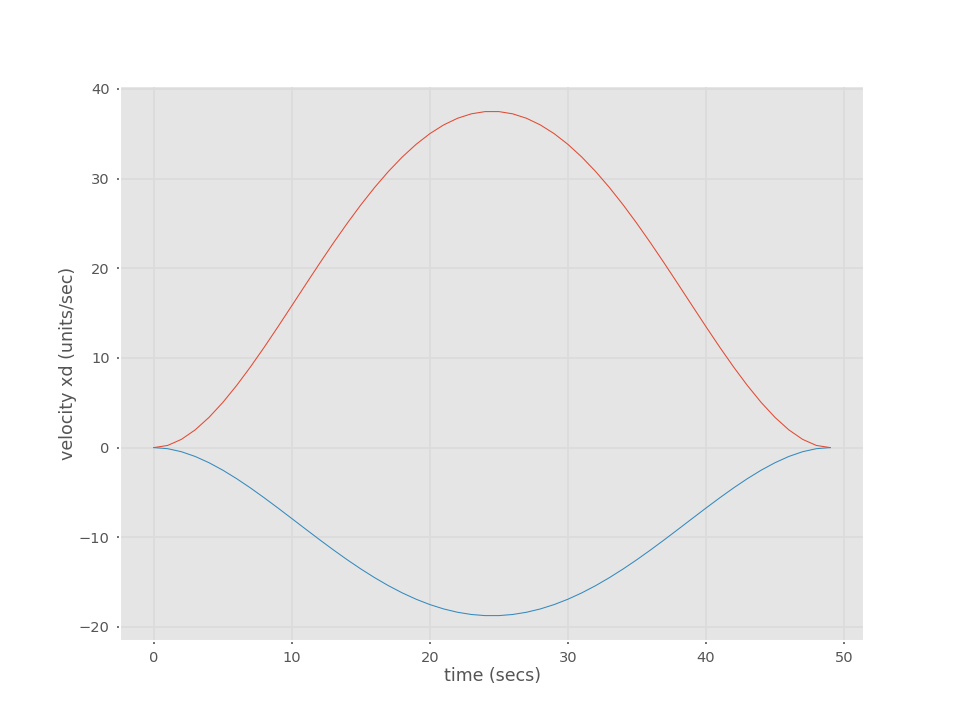

In [8]:
fig2 = plt.figure(2)

plt.xlabel('Time (secs)');
plt.ylabel('velocity xd (units/sec)');
plt.plot(xd);

You may also desire to specify initial and final velocities to each axis. 

In this case we will ask for the initial velocity to be 0 units/second and the final velocity to be 10 units/second in each axis:

In [11]:
first = np.array([10,20])
last  = np.array([30,10])

qd0   = np.array([0,0])
qdf   = np.array([10,10])

out = tr.jtraj(first, last, timesteps, qd0, qdf)

In [12]:
t   = out.t     # time coordinate
x   = out.q     # trajectory
xd  = out.qd    # velocity
xdd = out.qdd   # acceleration

<IPython.core.display.Javascript object>


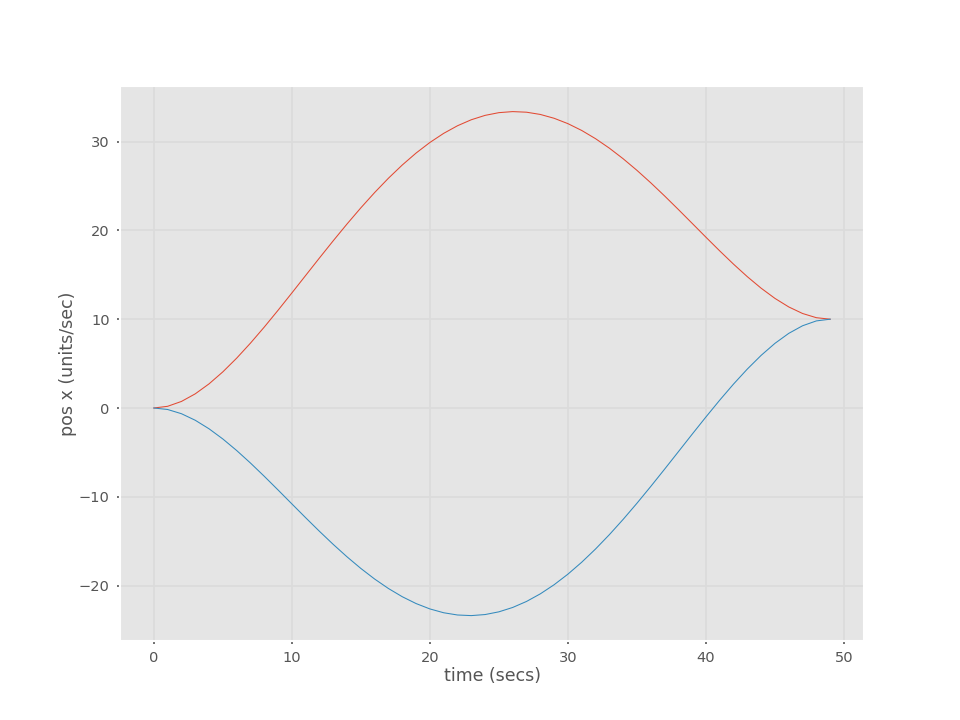

In [14]:
#plot velocity
fig3=plt.figure(3)
plt.xlabel('time (secs)');
plt.ylabel('pos x (units/sec)');
plt.plot(xd);

## 2D Example with Via-Points

A 2D trajectory with via points can also be computed. But to do this, we will need indendent vectors with blends. 

We can use mstraj as before. 

Set a first point of (40, 50) and via points at (60, 30), (40, 10), (20, 30) and returning back to the start position. It makes a diamond, starting at the top vertex and then moving clock-wise.

In [15]:
start=np.array([40,50])
via=np.array([
    [40,50],
    [60,30],
    [40,10],
    [20,30],
    [40,50]
    ])
print("Starting point at top of the diamond is: ", start)
print("Then move clock-wise around the diamond: \n", via)

Starting point at top of the diamond is:  [40 50]
Then move clock-wise around the diamond: 
 [[40 50]
 [60 30]
 [40 10]
 [20 30]
 [40 50]]


---
Compute the trajectory using the toolbox function **mstraj()**.
Provide:
- **multi-dimensional via points**

- a velocity of 2 units/second, 
- null segment velocities, 
- the start position, 
- the time step of 0.1 seconds 
- the acceleration time of 1 second:

In [16]:
dt   = 0.1
tacc = 1
qdmax= 2

out=tr.mstraj(via, dt, tacc, qdmax, q0=start)

0.6 0.3 [      40       50]
0.7 0.35 [      40       50]
0.7999999999999999 0.39999999999999997 [      40       50]
0.8999999999999999 0.44999999999999996 [      40       50]
0.9999999999999999 0.49999999999999994 [      40       50]
1.0999999999999999 0.5499999999999999 [      40       50]
1.2 0.6 [      40       50]
1.3 0.65 [      40       50]
1.4000000000000001 0.7000000000000001 [      40       50]
0.6 0.05454545454545454 [   41.09    48.91]
0.7 0.06363636363636363 [   41.27    48.73]
0.7999999999999999 0.07272727272727272 [   41.45    48.55]
0.8999999999999999 0.0818181818181818 [   41.64    48.36]
0.9999999999999999 0.0909090909090909 [   41.82    48.18]
1.0999999999999999 0.09999999999999999 [      42       48]
1.2 0.10909090909090909 [   42.18    47.82]
1.3 0.11818181818181818 [   42.36    47.64]
1.4000000000000001 0.1272727272727273 [   42.55    47.45]
1.5000000000000002 0.13636363636363638 [   42.73    47.27]
1.6000000000000003 0.14545454545454548 [   42.91    47.09]
1.70000

In [18]:
print("The trajectory lasts a total of ", out.t[-1], " secs.")

print("The segments times are as follows \n", out.arrive)
 
print("My via points are: \n", out.via.squeeze())

#print("Print out every nth point of the trajectory \n", out.q[0::10])
#out.info # Useful with more axis

The trajectory lasts a total of  45.800000000000004  secs.
The segments times are as follows 
 [       2     12.9     23.9     34.9     45.9]
My via points are: 
 [[40 50]
 [60 30]
 [40 10]
 [20 30]
 [40 50]]


Plot the figure of the joint angles for each joint. 

<IPython.core.display.Javascript object>


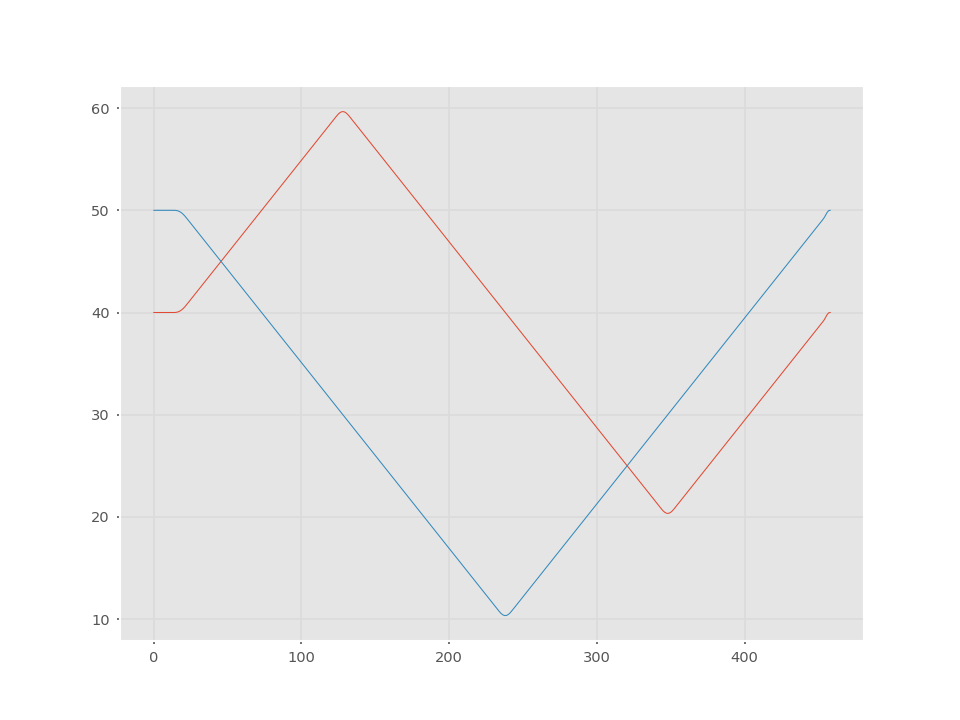

In [19]:
# Plot
fig4=plt.figure(4)
plt.plot(out.q);

There is another interesting way to plot this graph. 

Plotting the first coordinate versus the second coordinate shows the motion of the point on the xy-plane:

<IPython.core.display.Javascript object>


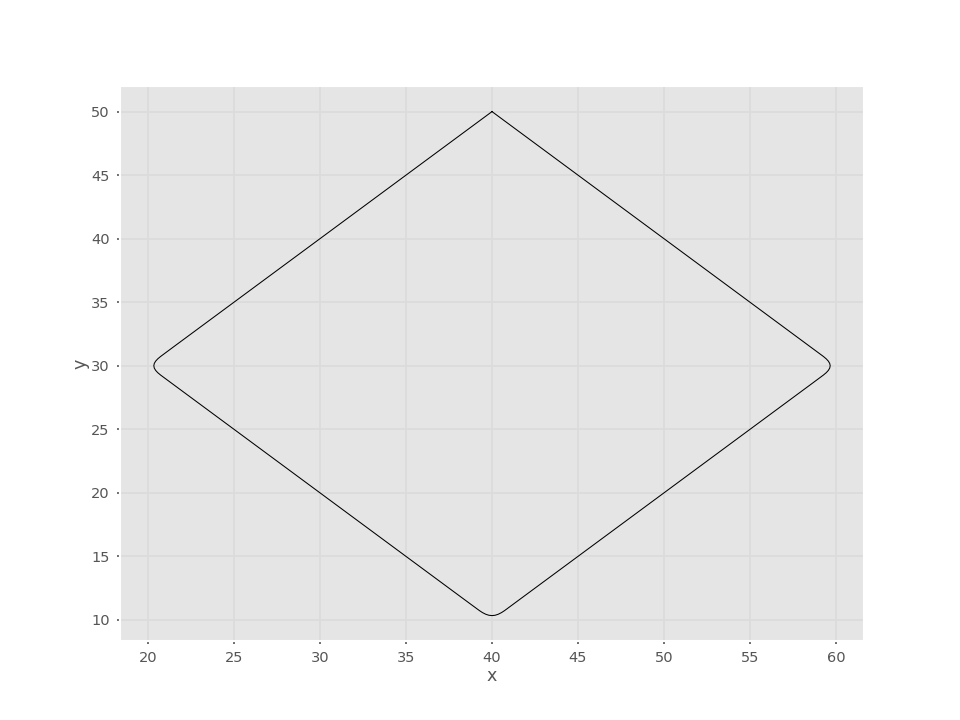

In [20]:
fig5=plt.figure(5)
plt.plot(out.q[:,0], out.q[:,1], color='black');
plt.xlabel('x');
plt.ylabel('y');

## What if we want each axis to move at a different velocity?

The velocity of each axis can be specified separately by passing a velocity vector qdmax. 

In this case a velocity of 1 unit/second in the x-axis and 3 units/second in the y-axis:

In [21]:
dt   = 0.1
tacc = 1.0
qdmax = [1,3]

out=tr.mstraj(via, dt, tacc, qdmax, q0=start)

0.6 0.3 [      40       50]
0.7 0.35 [      40       50]
0.7999999999999999 0.39999999999999997 [      40       50]
0.8999999999999999 0.44999999999999996 [      40       50]
0.9999999999999999 0.49999999999999994 [      40       50]
1.0999999999999999 0.5499999999999999 [      40       50]
1.2 0.6 [      40       50]
1.3 0.65 [      40       50]
1.4000000000000001 0.7000000000000001 [      40       50]
0.6 0.02857142857142857 [   40.57    49.43]
0.7 0.03333333333333333 [   40.67    49.33]
0.7999999999999999 0.03809523809523809 [   40.76    49.24]
0.8999999999999999 0.04285714285714285 [   40.86    49.14]
0.9999999999999999 0.047619047619047616 [   40.95    49.05]
1.0999999999999999 0.052380952380952375 [   41.05    48.95]
1.2 0.05714285714285714 [   41.14    48.86]
1.3 0.06190476190476191 [   41.24    48.76]
1.4000000000000001 0.06666666666666668 [   41.33    48.67]
1.5000000000000002 0.07142857142857144 [   41.43    48.57]
1.6000000000000003 0.07619047619047621 [   41.52    48.48]
1.

2.500000000000001 0.1190476190476191 [   22.38    32.38]
2.600000000000001 0.12380952380952386 [   22.48    32.48]
2.700000000000001 0.12857142857142861 [   22.57    32.57]
2.800000000000001 0.1333333333333334 [   22.67    32.67]
2.9000000000000012 0.13809523809523816 [   22.76    32.76]
3.0000000000000013 0.14285714285714293 [   22.86    32.86]
3.1000000000000014 0.14761904761904768 [   22.95    32.95]
3.2000000000000015 0.15238095238095245 [   23.05    33.05]
3.3000000000000016 0.15714285714285722 [   23.14    33.14]
3.4000000000000017 0.161904761904762 [   23.24    33.24]
3.5000000000000018 0.16666666666666674 [   23.33    33.33]
3.600000000000002 0.1714285714285715 [   23.43    33.43]
3.700000000000002 0.1761904761904763 [   23.52    33.52]
3.800000000000002 0.18095238095238106 [   23.62    33.62]
3.900000000000002 0.1857142857142858 [   23.71    33.71]
4.000000000000002 0.19047619047619055 [   23.81    33.81]
4.100000000000001 0.1952380952380953 [    23.9     33.9]
4.2000000000000

<IPython.core.display.Javascript object>


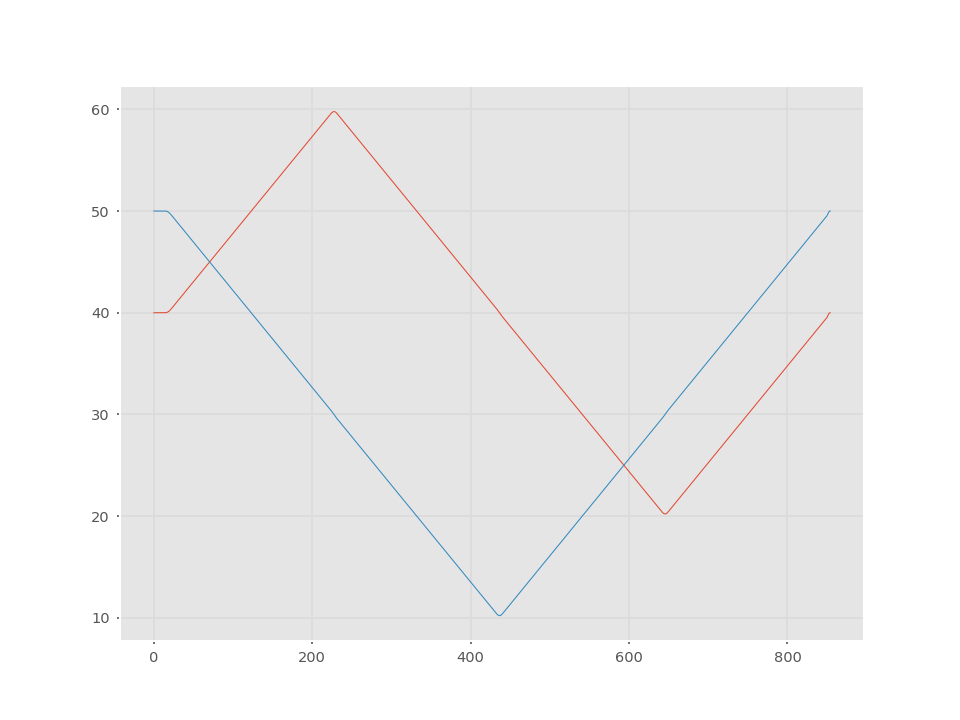

In [22]:
# plot with independent velocity profile
fig6=plt.figure(6)
plt.plot(out.q);

What do you notice about the duration of the above graph? 

What is the ration of qdmax before to the slower axis now?

---
We can again plot the 1st vs 2nd coordinate to show the xy motion:


<IPython.core.display.Javascript object>


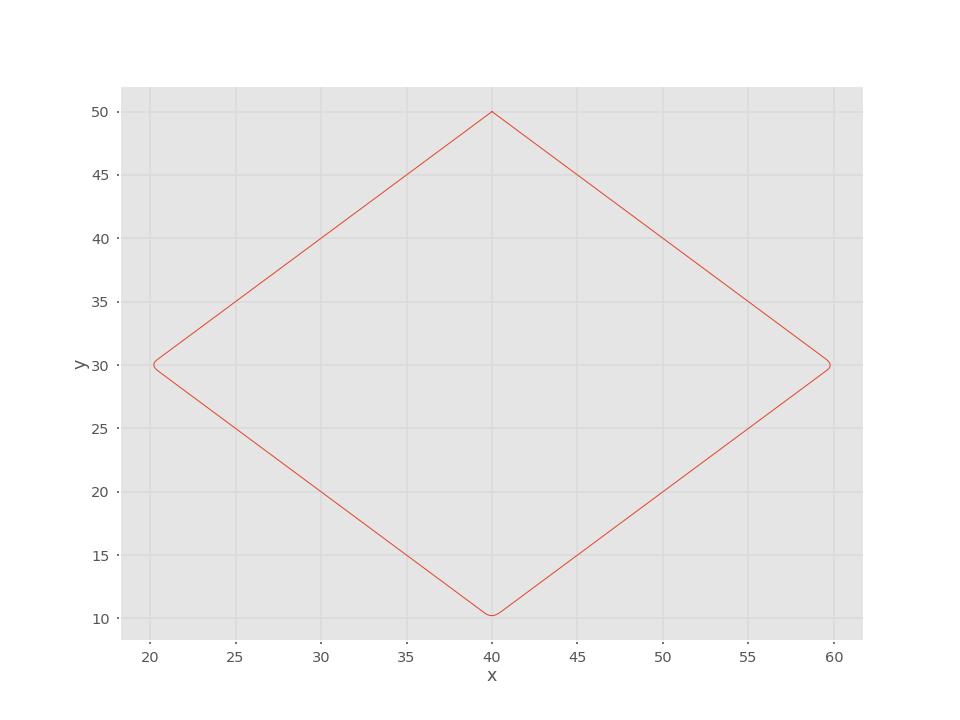

In [23]:
fig7=plt.figure(7)
plt.plot(out.q[:,0], out.q[:,1]);
plt.xlabel('x');
plt.ylabel('y');